In [1]:
from matplotlib import pylab as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [7]:
df = DataFrame(
    data = iris.data,
    columns = iris.feature_names
)

df['class'] = iris.target_names[iris.target]
df['target'] = iris.target

iris = df

In [9]:
iris.loc[0:150:15]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class,target
0,5.1,3.5,1.4,0.2,setosa,0
15,5.7,4.4,1.5,0.4,setosa,0
30,4.8,3.1,1.6,0.2,setosa,0
45,4.8,3.0,1.4,0.3,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
75,6.6,3.0,4.4,1.4,versicolor,1
90,5.5,2.6,4.4,1.2,versicolor,1
105,7.6,3.0,6.6,2.1,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
135,7.7,3.0,6.1,2.3,virginica,2


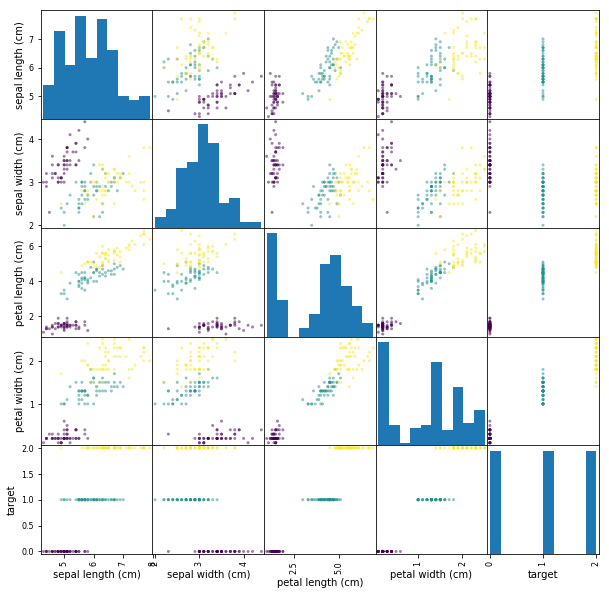

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, c=iris.target, figsize=(10,10));

Binäre Klassifikation

In [14]:
iris.columns.tolist()

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
 'class',
 'target']

In [15]:
X = iris[['sepal width (cm)','petal length (cm)']]

# make a grid
x1 = np.linspace(1,7,61)
x2 = np.linspace(1,7,61)
X1, X2 = np.meshgrid(x1,x2)
X_grid = np.array(list(zip(X1.ravel(), X2.ravel())))

Make binary target variable

In [34]:
Y_bin = (df.target == 1)

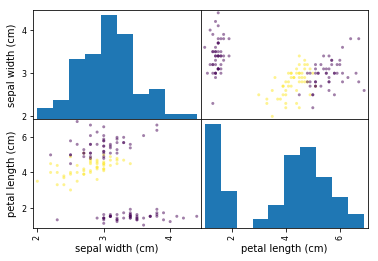

In [35]:
scatter_matrix(X, c=Y_bin);

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
classifier = LogisticRegression()
classifier.fit(X, Y_bin)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_bin, classifier.predict(X))

0.65333333333333332

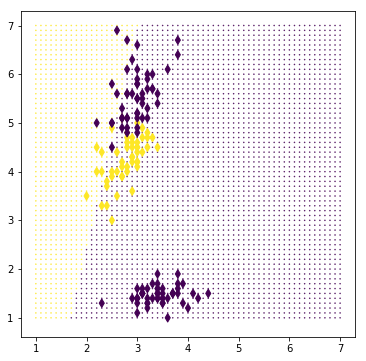

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(X_grid[:,0], X_grid[:,1], marker='.', c=classifier.predict(X_grid), s=1);
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y_bin, marker='d')

In [40]:
Y = iris.target

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC(kernel='linear')
svc.fit(X,Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
svc.score(X,Y)

0.95999999999999996

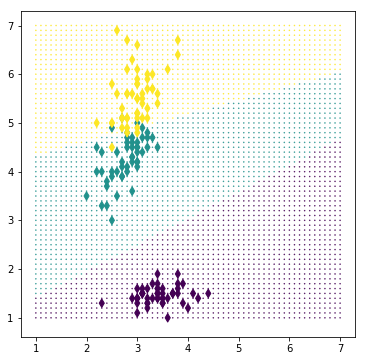

In [45]:
plt.figure(figsize=(6,6))
plt.scatter(X_grid[:,0], X_grid[:,1], marker='.', c=svc.predict(X_grid), s=1);
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, marker='d');

In [46]:
svc = SVC(kernel='rbf')
svc.fit(X,Y)
svc.score(X,Y)

0.95999999999999996

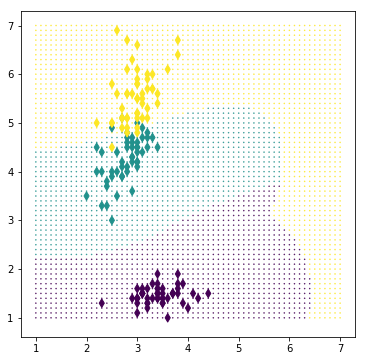

In [47]:
plt.figure(figsize=(6,6))
plt.scatter(X_grid[:,0], X_grid[:,1], marker='.', c=svc.predict(X_grid), s=1);
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=Y, marker='d');